# 5. 상위 5개 팀의 경기력 분석 - 패스편
직접 선정한 상위 5개팀을 승부를 예측하기 위해 비교하고, 패스 데이터들을 분석해 성향과 패스력을 채점해보려고 한다. 모든 액션은 국가별로 구하게 된다.
<hr>

- 패스 성공률 컬럼 추가 후 패스력을 채점하기 (능력치)
- 평균 키패스를 구하고 패스력을 채점하기 (능력치)
- 미들존 패스를 기준으로 두고 공격진영 / 수비진영의 각각 비율을 따져 상대값을 구하고 공격성 / 수비성이 짙은 색깔을 구하기 (성향)
- 좌향 / 우향 패스를 보고 선호하는 방향 확인 (성향)
- 롱패스 / 숏+백패스 비율을 구해서 롱패스를 많이 하는 팀인지 확인 (성향)

In [37]:
# Pandas 라이브러리 임포트
import pandas as pd
from pandas import Series, DataFrame

# 시각화를 위한 matplotlib 임포트
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
%matplotlib inline
plt.rcParams["font.family"] = "Malgun Gothic"

In [38]:
# 2021년 ~ 2022년 대표 5팀 에이매치 기록 데이터 불러오기

data = pd.read_excel('data/20212022matchdata.xlsx', header=[0, 1])
data.head()

분석팀                                                         ...  \
          날짜  국가 피파랭킹  포메이션 전반득점 전반실점 후반득점 후반실점         득점시간   실점시간  ...   
0 2021-03-25  독일   13   433    2    0    1    0       3,7,56    NaN  ...   
1 2021-03-28  독일   13   433    1    0    0    0           16    NaN  ...   
2 2021-03-31  독일   13  3142    0    1    1    1           63  45,85  ...   
3 2021-06-15  독일   12  3421    0    1    0    0          NaN     20  ...   
4 2021-06-19  독일   12  3421    2    1    2    1  35,39,51,60  15,67  ...   

                   상대팀                                               
   평균연령   평균신장      국가 피파랭킹  포메이션 오프사이드 공격권 박탈횟수 유효 슈팅  평균연령   평균신장  
0  29.0  185.0   아이슬란드   46  4141     1        6     2  32.1  187.1  
1  27.9  185.4    루마니아   37  4231     2        6     2  28.9  180.1  
2  27.5  183.8  북마케도니아   65   352     1        9     3  29.4  181.2  
3  29.8  185.5     프랑스    4   433     5        9     1  29.0  182.7  
4  29.5  185.5    포르투갈    9  4141     2        5     2  29.9  181.1  

[5 rows x 62 columns]

In [39]:
# 2021년 ~ 2022년 대표 5팀 에이매치 기록 데이터에 최종 스코어, 결과, 패스 성공률 컬럼 넣기

data[('분석팀', '최종득점')] = data[('분석팀', '전반득점')] + data[('분석팀', '후반득점')]
data[('분석팀', '최종실점')] = data[('분석팀', '전반실점')] + data[('분석팀', '후반실점')]
data[('분석팀', '패스 성공률')] = (data[('분석팀', '패스성공횟수')] / data[('분석팀', '패스횟수')] * 100).round(1)

def winlose(x) :
    if x[0] > x[1] :
        return '승'
    elif x[0] < x[1] :
        return '패'
    else :
        return '무'

data[('분석팀', '결과')] = data[[('분석팀', '최종득점'), ('분석팀', '최종실점')]].apply(winlose, axis = 1)
data

분석팀                                                                 \
            날짜    국가 피파랭킹  포메이션 전반득점 전반실점 후반득점 후반실점         득점시간         실점시간   
0   2021-03-25    독일   13   433    2    0    1    0       3,7,56          NaN   
1   2021-03-28    독일   13   433    1    0    0    0           16          NaN   
2   2021-03-31    독일   13  3142    0    1    1    1           63        45,85   
3   2021-06-15    독일   12  3421    0    1    0    0          NaN           20   
4   2021-06-19    독일   12  3421    2    1    2    1  35,39,51,60        15,67   
..         ...   ...  ...   ...  ...  ...  ...  ...          ...          ...   
96  2022-06-07  잉글랜드    5  4231    0    0    1    1           88           51   
97  2022-06-11  잉글랜드    5  4231    0    0    0    0          NaN          NaN   
98  2022-06-14  잉글랜드    5   433    0    1    0    3          NaN  16,70,80,89   
99  2022-09-23  잉글랜드    5   343    0    0    0    1          NaN           68   
100 2022-09-26  잉글랜드    5  3421    0    0    3    3     72,75,83     52,67,87   

     ...   상대팀                                    분석팀                 
     ...  포메이션 오프사이드 공격권 박탈횟수 유효 슈팅  평균연령   평균신장 최종득점 최종실점 패스 성공률 결과  
0    ...  4141     1        6     2  32.1  187.1    3    0   92.6  승  
1    ...  4231     2        6     2  28.9  180.1    1    0   89.8  승  
2    ...   352     1        9     3  29.4  181.2    1    2   88.8  패  
3    ...   433     5        9     1  29.0  182.7    0    1   89.2  패  
4    ...  4141     2        5     2  29.9  181.1    4    2   90.2  승  
..   ...   ...   ...      ...   ...   ...    ...  ...  ...    ... ..  
96   ...  3412     4       14     6  28.1  185.6    1    1   79.0  무  
97   ...   433     0        4     3  26.0  182.9    0    0   88.9  무  
98   ...  3421     0       12     5  27.8  185.1    0    4   88.9  패  
99   ...   352     2        3     3  27.2  185.1    0    1   88.3  패  
100  ...  4231     1       12     4  26.4  182.3    3    3   79.0  무  

[101 rows x 66 columns]

## 5-0. 능력치 채점판
- 공격력 분석을 하며 실시간으로 공격력을 추가할 것이다.

In [40]:
stateboard = DataFrame(data = [0, 0, 0, 0, 0],
            index =  ['독일','프랑스','포르투갈', '스페인', '잉글랜드'],
            columns = ['패스력'])
stateboard

,패스력
독일,0
프랑스,0
포르투갈,0
스페인,0
잉글랜드,0


## 5-1. 패스 성공률 컬럼 추가 후 패스력을 채점하기 (능력치)
- 패스력이 높을수록 공격이나 수비가 원활하니 승점이 높을 것이다.

In [42]:
#패스성공률이라는 컬럼을 추가해 패스성공률(패스성공횟수/패스횟수*100)저장해준다.
data[('분석팀', '패스성공률')] = round(data[('분석팀', '패스성공횟수')] / data[('분석팀', '패스횟수')] * 100, 2)
data[('분석팀', '패스성공률')]

0      92.57
1      89.80
2      88.84
3      89.16
4      90.19
       ...  
96     78.98
97     88.94
98     88.93
99     88.27
100    79.02
Name: (분석팀, 패스성공률), Length: 101, dtype: float64

In [43]:
#pass_country를 추가해 국가 별로 각 경기 패스 성공률 평균을 구한다.
pass_country = round(data['분석팀'].pivot_table(index = '국가', aggfunc = 'mean', values = '패스성공률').sort_values(by = '패스성공률', ascending = False),2)
pass_country

,패스성공률
국가,
스페인,88.98
독일,88.96
프랑스,88.93
잉글랜드,87.08
포르투갈,85.61


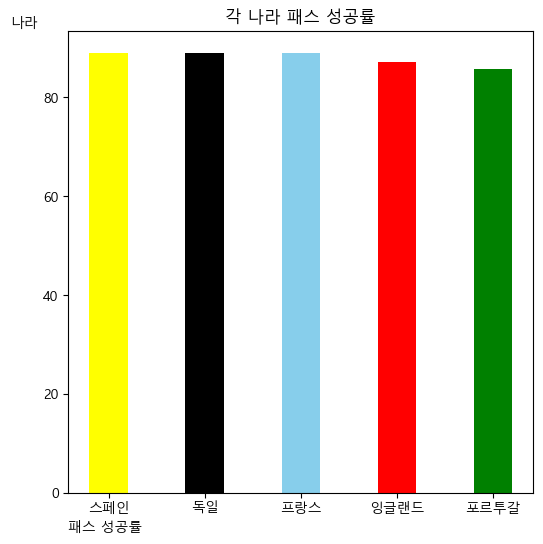

In [44]:
#각 나라 패스 성공률의 시각화
#시각화를 위한 5,5크기의 데이터를 만든다.
plt.rcParams["figure.figsize"] = (6,6)
#colors라는 변수안에 여러가지 색의 배열을 넣어준다.
colors = ['yellow','black','skyblue','red','green'] #독일(검정),프랑스(하늘),포르투갈(초록),잉글랜드(빨강),스페인(노랑)
#bar 그래프로 표현해준다 이때 색은 배열 순으로 나타나진다.
plt.bar(x=pass_country.index,height=pass_country['패스성공률'],color=colors ,width = 0.4)
plt.title('각 나라 패스 성공률')
#x,y 축의 이름을 설정해준다.
plt.xlabel('패스 성공률',loc="left")
plt.ylabel('나라',rotation=360, loc="top")

plt.show()

In [45]:
# 패스력 채점(패스성공률)

stateboard.loc['독일'] += pass_country.loc['독일', '패스성공률'].round(1)
stateboard.loc['프랑스'] += pass_country.loc['프랑스', '패스성공률'].round(1)
stateboard.loc['포르투갈'] += pass_country.loc['포르투갈', '패스성공률'].round(1)
stateboard.loc['스페인'] += pass_country.loc['스페인', '패스성공률'].round(1)
stateboard.loc['잉글랜드'] +=pass_country.loc['잉글랜드', '패스성공률'].round(1)
stateboard.sort_values(by = '패스력', ascending = False)

,패스력
독일,89.0
스페인,89.0
프랑스,88.9
잉글랜드,87.1
포르투갈,85.6


## 5-2.평균 키패스를 구하고 패스력을 채점하기 (능력치)
- 평균 키패스의 수를 앎으로써 그 팀의 공격수준을 알 수 있다.

In [46]:
#keypass를 추가해 국가 별로 각 경기 패스 성공률 평균을 구한다.

keypass = round(data['분석팀'].pivot_table(index = '국가', aggfunc = 'mean', values = '키패스').sort_values(by = '키패스', ascending = False),2)
keypass

,키패스
국가,
독일,12.80
포르투갈,12.10
프랑스,11.28
스페인,10.40
잉글랜드,10.00


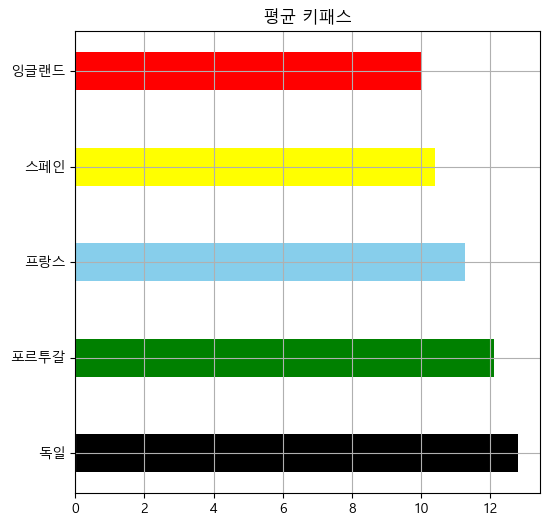

In [47]:
#키패스 성공률의 시각화
plt.rcParams["figure.figsize"] = (6,6)
#colors라는 변수안에 여러가지 색의 배열을 넣어준다.
colors = ['black','green','skyblue','yellow','red'] #독일(검정),프랑스(하늘),포르투갈(초록),잉글랜드(빨강),스페인(노랑)
#키패스 성공률을 barh형식으로 시각화해준다.
plt.barh(width = keypass['키패스'],y= keypass.index,color = colors,height = 0.4)
plt.title("평균 키패스")
plt.grid(True)

In [48]:
#패스력 채점(키패스)

stateboard.loc['독일'] += keypass.loc['독일', '키패스'].round(2) * 5
stateboard.loc['프랑스'] += keypass.loc['프랑스', '키패스'].round(2) * 5
stateboard.loc['포르투갈'] += keypass.loc['포르투갈', '키패스'].round(2) * 5
stateboard.loc['스페인'] += keypass.loc['스페인', '키패스'].round(2) * 5
stateboard.loc['잉글랜드'] += keypass.loc['잉글랜드', '키패스'].round(2) * 5
stateboard.sort_values(by = '패스력', ascending = False)

,패스력
독일,153.0
포르투갈,146.1
프랑스,145.3
스페인,141.0
잉글랜드,137.1


## 5-3. 미들존 패스를 기준으로 두고 공격진영 / 수비진영패스의 수를 따져 상대값을 구하고 공격성/수비성 어디가 높은지 알아보기(성향)
- 공격진영 패스가 많다면 득점이 많은 것이고,수비진영 패스가 많다면 상대적으로 실점이 적을 것이다.


In [49]:
#미들필드존패스,공격진영패스,수비진영패스 평균을 구한다.
Pass = round(data['분석팀'].pivot_table(index = '국가', aggfunc = 'mean', values = '미들필드존패스').sort_values(by = '미들필드존패스', ascending = False),1)
Pass['공격진영패스'] = round(data['분석팀'].pivot_table(index = '국가', aggfunc = 'mean', values = '공격진영향한패스'),1)
Pass['수비진영패스'] = round(data['분석팀'].pivot_table(index = '국가', aggfunc = 'mean', values = '수비진영향한패스'),1)
#공격패스비율과 수비패스비율을 구하고 값을 차 함으로써 상위2개 팀은 공격성향 중간팀은 중립 남은 2개팀은 수비성향이 된다.
Pass['공격패스비율'] = round(Pass['공격진영패스']/(Pass['미들필드존패스'] + Pass['공격진영패스'] + Pass['수비진영패스']),2)*100
Pass['수비패스비율'] = round(Pass['수비진영패스']/(Pass['미들필드존패스'] + Pass['공격진영패스'] + Pass['수비진영패스']),2)*100
Pass['공격패스-수비패스'] = Pass['공격패스비율'] - Pass['수비패스비율']
Pass.sort_values(by = "공격패스-수비패스",ascending = False)

,미들필드존패스,공격진영패스,수비진영패스,공격패스비율,수비패스비율,공격패스-수비패스
국가,,,,,,
독일,368.8,261.8,131.6,34.0,17.0,17.0
프랑스,353.3,218.6,106.6,32.0,16.0,16.0
포르투갈,287.4,184.9,109.3,32.0,19.0,13.0
스페인,444.5,258.4,154.0,30.0,18.0,12.0
잉글랜드,446.7,198.8,109.3,26.0,14.0,12.0


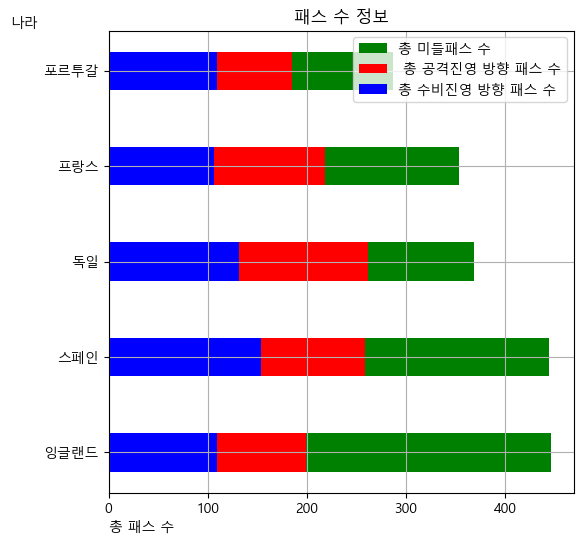

In [62]:
#미들존패스/공격진영 패스/수비진영패스 평균 시각화
plt.rcParams["figure.figsize"] = (6,6)

#각 나라의 패스정보를 barh그래프로 표현한다.
plt.barh(width = Pass['미들필드존패스'],y = Pass.index,color='green',height = 0.4,label = '총 미들패스 수')
plt.barh(width = Pass['공격진영패스'],y = Pass.index,color='red', height = 0.4,label = ' 총 공격진영 방향 패스 수')
plt.barh(width = Pass['수비진영패스'],y = Pass.index,color='blue',height = 0.4, label = '총 수비진영 방향 패스 수' )

#x,y축,시각화 제목,label 등을 출력해준다.
plt.xlabel('총 패스 수',loc="left")
plt.ylabel('나라',rotation=360, loc="top")
plt.legend(loc='upper right')
plt.grid(True)
plt.title('패스 수 정보')
plt.show()

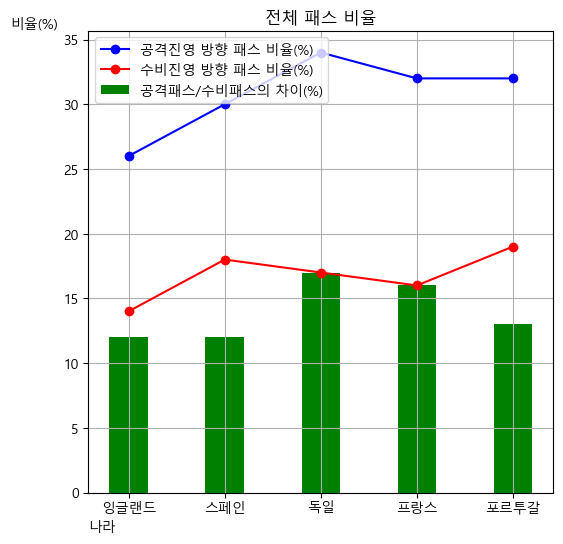

In [51]:
#전체 패스 비율 시각화하기

#그래프를 그리기 위한 판 나타기
plt.rcParams["figure.figsize"] = (6,6)

#각 패스 종류의 비율을 plot 그래프로 표현한다.  

plt.plot(Pass.index,Pass['공격패스비율'],color='blue',marker='o',label='공격진영 방향 패스 비율(%)')
plt.plot(Pass.index,Pass['수비패스비율'],color='red',marker='o',label='수비진영 방향 패스 비율(%)')
plt.bar(x=Pass.index,height=Pass['공격패스-수비패스'],color='green' ,width = 0.4,label = '공격패스/수비패스의 차이(%)')
plt.grid(True)

#x,y축,시각화 제목,label 등을 출력해준다.
plt.xlabel('나라',loc='left')
plt.ylabel('비율(%)',rotation=360,loc="top")
plt.legend(loc='upper left')
plt.title('전체 패스 비율')
plt.show()

In [52]:
#성향 데이터프레임 출력
examboard = DataFrame(data = ['공격성', '공격성', '중립', '수비성', '수비성'],
            index =  ['독일','프랑스','포르투갈', '스페인', '잉글랜드'],
            columns = ['패스호전성'])
examboard

,패스호전성
독일,공격성
프랑스,공격성
포르투갈,중립
스페인,수비성
잉글랜드,수비성


## 5-4 좌향/우향 패스를 보고 선호하는 방향 확인(성향)
- 더 높은 수를 앎으로서 그 팀의 패스 위치 성향을 알 수 있다.

In [53]:
#모든 경기 좌향/우향 패스 평균을 구한다.

WherePass = round(data['분석팀'].pivot_table(index = '국가', aggfunc = 'mean', values = '좌향패스').sort_values(by = '좌향패스', ascending = False),1)
WherePass['우향패스'] = round(data['분석팀'].pivot_table(index = '국가', aggfunc = 'mean', values = '우향패스'),1)
WherePass

,좌향패스,우향패스
국가,,
스페인,427.1,426.0
독일,380.0,379.2
프랑스,336.6,334.6
잉글랜드,325.8,320.0
포르투갈,290.4,286.0


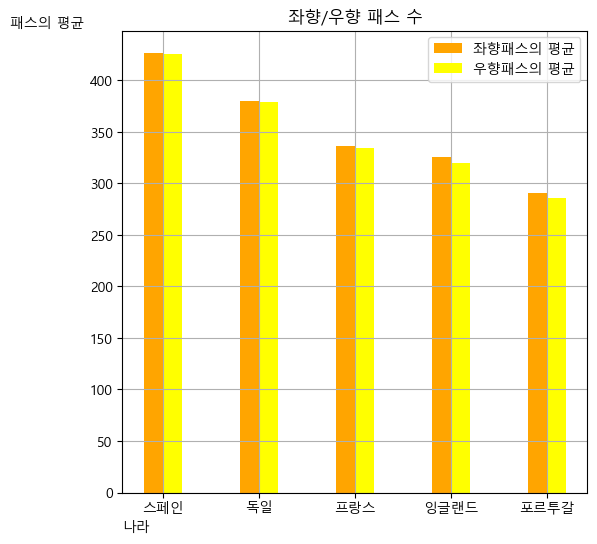

In [54]:
#좌향/우향 패스를 보고 선호하는 방향 시각화
#그래프를 그리기 위한 판 나타기
plt.rcParams["figure.figsize"] = (6,6)

#x라는 좌표를 지정해 같은 인덱스 값에 여러 컬럼 시각화를 가능하게 해준다.
x = np.array(list(range(0, len(WherePass))))

# x 위치에, 항목 이름으로 패스방향위치.index(국가명)을 붙입니다.
plt.xticks(x, WherePass.index)

plt.bar(x-0.1,WherePass['좌향패스'],color = 'orange',   width = 0.2, label = '좌향패스의 평균')
plt.bar(x+0.1,WherePass['우향패스'],color = 'yellow',   width = 0.2, label = '우향패스의 평균')

#x,y축,시각화 제목,label 등을 출력해준다.
plt.xlabel('나라',loc="left")
plt.ylabel('패스의 평균',rotation=360, loc="top")
plt.legend(loc='upper right')
plt.title("좌향/우향 패스 수")
plt.grid(True)

In [55]:
#좌향패스/우향패스 평균을 비교함으로서 선호방향을 출력해준다.
examboard = DataFrame(data = ['좌향', '좌향', '좌향', '좌향', '좌향'],
            index =  ['독일','프랑스','포르투갈', '스페인', '잉글랜드'],
            columns = ['선호방향'])
examboard

,선호방향
독일,좌향
프랑스,좌향
포르투갈,좌향
스페인,좌향
잉글랜드,좌향


## 5-5 롱패스 / 숏 + 백패스 비율을 구해서 롱패스를 더 많이하는 팀 측정하기(성향)
- 롱패스 / 숏 + 백패스 비율을 앎으로서 어떤 팀이 어떤 패스를 주로 하는지 알 수 있다.

In [56]:
#모든 경기에 롱패스,숏패스+백패스 수와 롱패스/숏+백패스 비율의 데이터프레임을 구해준다.
LengthPass = data['분석팀'].pivot_table(index = '국가', aggfunc = 'sum', values = '롱패스')
LengthPassS =  data['분석팀'].pivot_table(index = '국가', aggfunc = 'sum', values = '숏패스')
LengthPassB =  data['분석팀'].pivot_table(index = '국가', aggfunc = 'sum', values = '백패스')
LengthPass['숏+백패스'] = LengthPassS['숏패스'] + LengthPassB['백패스']
LengthPass['비율'] = round((LengthPass['롱패스']/(LengthPassS['숏패스'] + LengthPassB['백패스'])*100),2)
#비율을 기준으로 내림차순을 해준다
LengthPass.sort_values(by = '비율', ascending = False)

,롱패스,숏+백패스,비율
국가,,,
스페인,1802,22593,7.98
포르투갈,1100,15096,7.29
잉글랜드,1231,19862,6.20
프랑스,798,16206,4.92
독일,878,20229,4.34


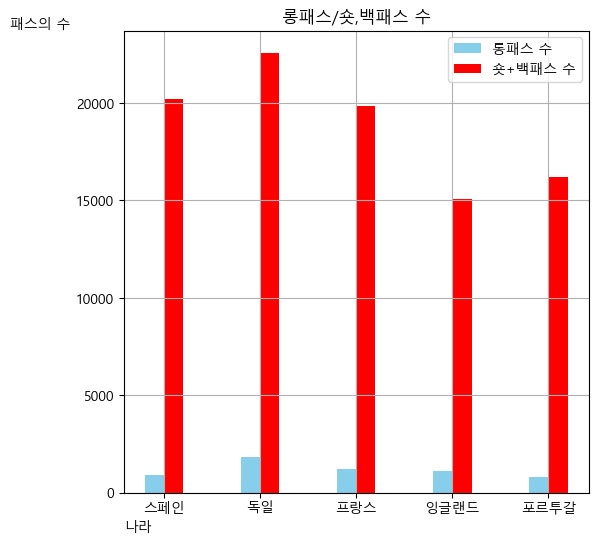

In [57]:
#롱패스,숏+백패스 총 수 시각화 하기
#그래프를 그리기 위한 판 나타기
plt.rcParams["figure.figsize"] = (6,6)

#x라는 좌표를 지정해 같은 인덱스 값에 여러 컬럼 시각화를 가능하게 해준다.
x = np.array(list(range(0, len(WherePass))))

# x 위치에, 항목 이름으로 패스방향위치.index(국가명)을 붙입니다.
plt.xticks(x, WherePass.index)

plt.bar(x-0.1,LengthPass['롱패스'],color = 'skyblue',   width = 0.2, label = '롱패스 수')
plt.bar(x+0.1,LengthPass['숏+백패스'],color = 'red',   width = 0.2, label = '숏+백패스 수')

#x,y축,시각화 제목,label 등을 출력해준다.
plt.xlabel('나라',loc="left")
plt.ylabel('패스의 수',rotation=360, loc="top")
plt.legend(loc='upper right')
plt.title("롱패스/숏,백패스 수")
plt.grid(True)

In [58]:
#비율이 높은 2팀은 롱패스 위주 중간 1팀은 중립,비율이 낮은 2팀은 숏+백패스 위주 성향으로 값을 넣어준다,
examboard = DataFrame(data = ['숏+백패스 위주', '숏+백패스 위주', '롱패스 위주', '롱패스 위주', '중립'],
            index =  ['독일','프랑스','포르투갈', '스페인', '잉글랜드'],
            columns = ['패스 위치 선호도'])
examboard

,패스 위치 선호도
독일,숏+백패스 위주
프랑스,숏+백패스 위주
포르투갈,롱패스 위주
스페인,롱패스 위주
잉글랜드,중립


## 5-6 최종 시각화
- 패스력을 결정짓는 요인들을 한 곳에 모아서 시각화 해준다.

In [59]:
#위에서 진행한 패스력을 결정하는 요인들을 한곳에 모아서 출력해준다.
sr = pd.concat([pass_country,keypass,stateboard], axis = 1)
sr.sort_index(inplace = True)
sr.sort_values(by = '패스력', ascending = False)

,패스성공률,키패스,패스력
독일,88.96,12.80,153.0
포르투갈,85.61,12.10,146.1
프랑스,88.93,11.28,145.3
스페인,88.98,10.40,141.0
잉글랜드,87.08,10.00,137.1


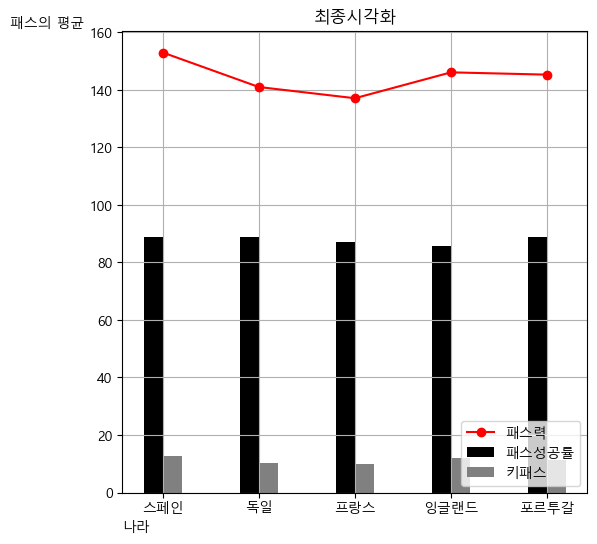

In [60]:
#최종시각화
#롱패스,숏+백패스 총 수 시각화 하기
#그래프를 그리기 위한 판 나타기
plt.rcParams["figure.figsize"] = (6,6)

#x라는 좌표를 지정해 같은 인덱스 값에 여러 컬럼 시각화를 가능하게 해준다.
x = np.array(list(range(0, len(WherePass))))

# x 위치에, 항목 이름으로 패스방향위치.index(국가명)을 붙입니다.
plt.xticks(x, WherePass.index)

plt.bar(x-0.1,sr['패스성공률'],color = 'black',   width = 0.2, label = '패스성공률')
plt.bar(x+0.1,sr['키패스'],color = 'grey',   width = 0.2, label = '키패스')
plt.plot(sr.index,sr['패스력'],color='red',marker='o',label='패스력')


#x,y축,시각화 제목,label 등을 출력해준다.
plt.xlabel('나라',loc="left")
plt.ylabel('패스의 평균',rotation=360, loc="top")
plt.legend(loc='lower right')
plt.title("최종시각화")
plt.grid(True)